In [ ]:
from tools import *
plt.ion()
from matplotlib import patches, lines, text
d = load_data()
%config InlineBackend.figure_format = 'retina'

# Magnitude and angles

In [ ]:
def find_mag_ang(x, z):
    mag = np.sqrt(x**2 + z**2)
    arctan = np.arctan(z/x) * 180 / np.pi
    arcsin = np.arcsin(z/mag) * 180 / np.pi
    arccos = np.arccos(x/mag) * 180 / np.pi
    
    if x > 0 and z > 0:
        ang = np.arctan(z/x) * 180/np.pi
    elif x < 0 and z > 0:
        ang = 180 + np.arctan(z/x) * 180/np.pi
    elif x < 0 and z < 0:
        ang = 180 + np.arctan(z/x) * 180/np.pi
    elif x > 0 and z < 0:
        ang = 2 * 180 + np.arctan(z/x) * 180/np.pi
    
    return(mag, ang, arctan, arcsin, arccos)

In [ ]:
trial = d['P11']['trials']['t41']

print trial['name']
x = trial['index8x'][-1] - trial['objectx'][-1]
z = trial['index8z'][-1] - trial['objectz'][-1] - 0.02
mag, ang, arctan, arcsin, arccos = find_mag_ang(x, z)

print 'Magnitude = {}'.format(mag)
print 'Angle     = {}'.format(ang)
print '-----'
print 'arctan(t) = {}'.format(arctan)
print 'arcsin(t) = {}'.format(arcsin)
print 'arccos(t) = {}'.format(arccos)


In [ ]:
style.use('ggplot')
fig = plt.figure(figsize = (5,5))
ax1 = fig.add_subplot(111)

ind_x = trial['index8x'][-1]
ind_z = trial['index8z'][-1]
obj_x = trial['objectx'][-1]
obj_z = trial['objectz'][-1]

xl, xr = obj_x - 0.1, obj_x + 0.1
yb, yt = obj_z - 0.1, obj_z + 0.1
asp = (xr - xl) / (yt - yb)

ax1.add_patch(patches.Rectangle( (obj_x - 0.02, obj_z - 0.02), 0.04, 0.04, color = [0.8, 0.8, 0.8]) )
ax1.add_line(lines.Line2D([ind_x, obj_x], [ind_z, obj_z + 0.02], linewidth = 1))
ax1.plot(ind_x, ind_z, 'rx')
ax1.plot(obj_x, obj_z + 0.02, 'rx')
ax1.plot(obj_x, obj_z,'k+')

ax1.set_xlim(xl, xr)
ax1.set_ylim(yb, yt)
ax1.set_aspect(asp)
ax1.set_title(trial['name'])
ax1.text(xr + 0.02, yt - 0.06, 'Magnitude = {}\nAngle = {}\n\narctan = {}\narcsin = {}\narccos = {}'\
         .format(np.round(mag, 4)*100, np.round(ang, 2), np.round(arctan, 2), np.round(arcsin, 2), np.round(arccos, 2)))

# Results 5 June

In [10]:
from tools import *
import pandas as pd
d = manual_load_data('clean_data.pkl')

In [11]:
d['P07']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist11'}
d['P08']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist11'}
d['P09']['markers'] = {'index': 'index7', 'thumb': 'trumb9', 'wrist': 'wrist11'}
d['P11']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist11'}
d['P12']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist11'}
d['P16']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist12'}
d['P18']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist11'}
d['P19']['markers'] = {'index': 'index8', 'thumb': 'trumb9', 'wrist': 'wrist11'}

In [41]:
df = pd.DataFrame(columns = ['ocl', 'ocr', 'onl', 'onr', 'vcl', 'vcr', 'vnl', 'vnr'], index = d.keys())

for name, subj in d.items():
    ocl = []; onl = []; ocr = []; onr = []; vcl = []; vcr = []; vnl = []; vnr = [];
    ind = subj['markers']['index'] + 'x'
#     ind = 'averagexeye'
    for trial in subj['trials'].values():
        if   'Occlusion_Cue_LeftToRight' in trial['name']:
            ocl.append(trial[ind][-1] - trial['objectx'][-1])
        elif 'Occlusion_Cue_RightToLeft' in trial['name']:
            ocr.append((trial[ind][-1] - trial['objectx'][-1]) * -1)
        elif 'Occlusion_NoCue_LeftToRight' in trial['name']:
            onl.append(trial[ind][-1] - trial['objectx'][-1])
        elif 'Occlusion_NoCue_RightToLeft' in trial['name']:
            onr.append((trial[ind][-1] - trial['objectx'][-1]) * -1)
        elif 'Visible_Cue_LeftToRight' in trial['name']:
            vcl.append(trial[ind][-1] - trial['objectx'][-1])
        elif 'Visible_Cue_RightToLeft' in trial['name']:
            vcr.append((trial[ind][-1] - trial['objectx'][-1]) * -1)
        elif 'Visible_NoCue_LeftToRight' in trial['name']:
            vnl.append(trial[ind][-1] - trial['objectx'][-1])
        elif 'Visible_NoCue_RightToLeft' in trial['name']:
            vnr.append((trial[ind][-1] - trial['objectx'][-1]) * -1)
    df.loc[name] = [np.mean(ocl), np.mean(ocr), np.mean(onl), np.mean(onr),
                    np.mean(vcl), np.mean(vcr), np.mean(vnl), np.mean(vnr)]

In [23]:
df.mean(axis = 0)
df.std(axis = 0)

ocl   -0.063727
onl   -0.058095
ocr   -0.064551
onr   -0.062168
vcl   -0.012636
vcr   -0.004167
vnl   -0.011450
vnr   -0.004933
dtype: float64

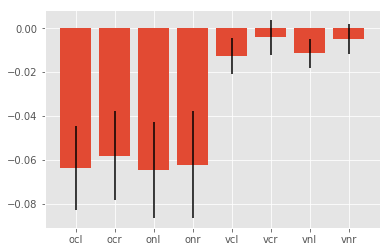

In [42]:
x = np.arange(df.shape[1])
means = df.mean(axis = 0)
std = df.std(axis = 0)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, means, yerr = std)
ax.set_xticks(x)
ax.set_xticklabels(df.columns.values.tolist())
plt.show()

<IPython.core.display.Javascript object>


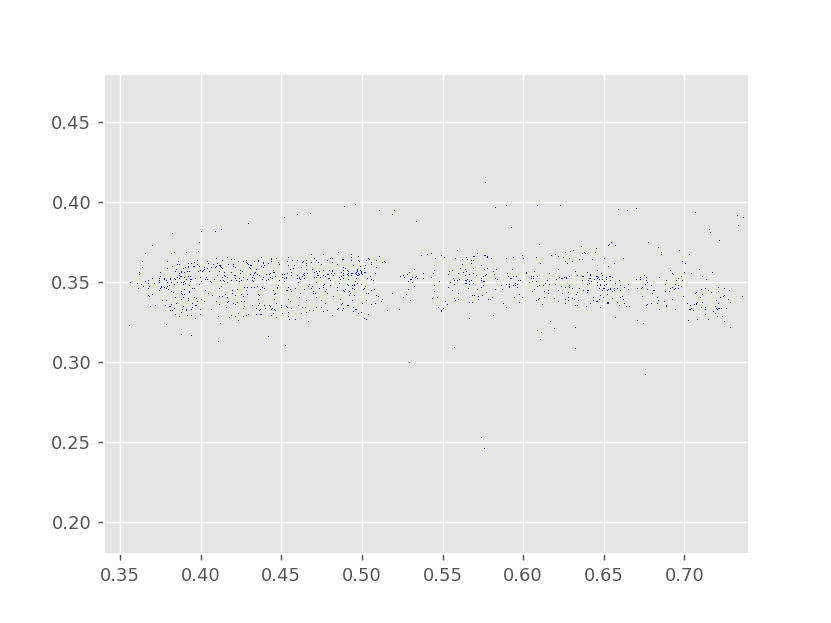

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(0.18, 0.48)
ax.set_xlim(0.34, 0.74)

for subj in d.values():
    for trial in subj['trials'].values():
        if 'Occlusion_Cue_LeftToRight' in trial['name']:
            ax.plot(trial['fix']['centre_x'], trial['fix']['centre_z'], 'b,')
plt.show()